# Programming Exercise 7: _K_-means Clustering and Principal Component Analysis
# 1 _K_-means Clustering
## 1.1 Implementing _K_-means
### 1.1.1 Finding closest centroids

In [1]:
import scipy.io

data = scipy.io.loadmat('../matlab/ex7data2.mat')
print data.keys()

['X', '__version__', '__header__', '__globals__']


In [2]:
X = data['X']
print X.shape

(300, 2)


In [3]:
import numpy as np

K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]]);

In [4]:
def find_closest_centroids(X, centroids):
    n, xdim = X.shape
    K, cdim = centroids.shape
    assert xdim == cdim
    ### YOUR CODE HERE ###




    ######################

cid = find_closest_centroids(X, initial_centroids)  # IDs of closest centroids
print cid[:3]  # should be [0, 2, 1]

[0 2 1]


### 1.1.2 Computing centroid means
$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_i} x^{(i)}$

In [5]:
def compute_centroids(X, cid, K):
    _, d = X.shape
    centroids = np.zeros((K, d))
    ### YOUR CODE HERE ###




    ######################

print compute_centroids(X, cid, K)

[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]


## 1.2 _K_-means on example dataset

In [6]:
max_iters = 10
centroids = initial_centroids
centroids_history = [centroids]
for _ in range(max_iters):
    cid = find_closest_centroids(X, centroids)
    centroids = compute_centroids(X, cid, K)
    centroids_history.append(centroids)

cid = find_closest_centroids(X, centroids)

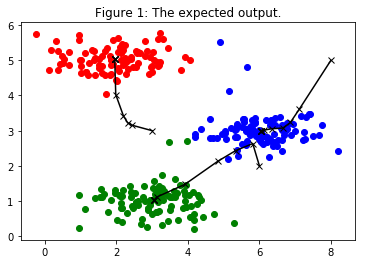

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(X[cid==0,0], X[cid==0,1], color='r')
plt.scatter(X[cid==1,0], X[cid==1,1], color='g')
plt.scatter(X[cid==2,0], X[cid==2,1], color='b')
for i in range(K):
    trajectory = np.array([centroids[i] for centroids in centroids_history])
    plt.plot(trajectory[:,0], trajectory[:,1], 'kx-')
plt.title('Figure 1: The expected output.')

## 1.3 Random initialization

In [8]:
n, _ = X.shape
rand_indices = np.random.permutation(range(n))
centroids = X[rand_indices[:K], :]

## 1.4 Image compression with K-means

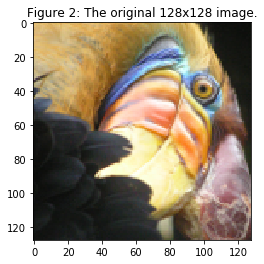

In [9]:
from PIL import Image

img = Image.open('../matlab/bird_small.png')
img = np.asarray(img)
plt.imshow(img)
plt.title('Figure 2: The original 128x128 image.')

### 1.4.1 K-means on pixels

In [10]:
print img.shape
print img[:2, :2, :]

(128, 128, 3)
[[[219 180 103]
  [230 185 116]]

 [[230 193 119]
  [224 192 120]]]


In [11]:
X = np.reshape(img, (128 * 128, 3))
K = 16

n, _ = X.shape
rand_indices = np.random.permutation(range(n))
centroids = X[rand_indices[:K], :]
for _ in range(max_iters):
    cid = find_closest_centroids(X, centroids)
    centroids = compute_centroids(X, cid, K)

cid = find_closest_centroids(X, centroids)

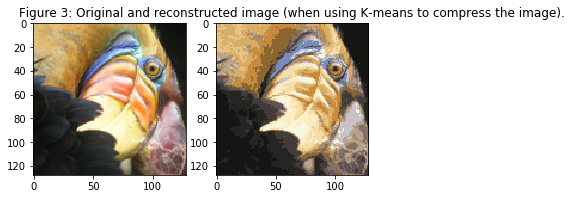

In [12]:
X16 = np.zeros(X.shape, dtype=np.uint8)
for i in range(K):
    X16[cid == i, :] = centroids[i]

img16 = np.reshape(X16, (128, 128, 3))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img16)
plt.title('Figure 3: Original and reconstructed image (when using K-means to compress the image).')